# EDA

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6

Downloading...
From: https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 52.7MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/teleCust1000t.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
data.isna().sum()

,0
region,0
tenure,0
age,0
marital,0
address,0
income,0
ed,0
employ,0
retire,0
gender,0


In [7]:
data.dtypes

,0
region,int64
tenure,int64
age,int64
marital,int64
address,int64
income,float64
ed,int64
employ,int64
retire,float64
gender,int64


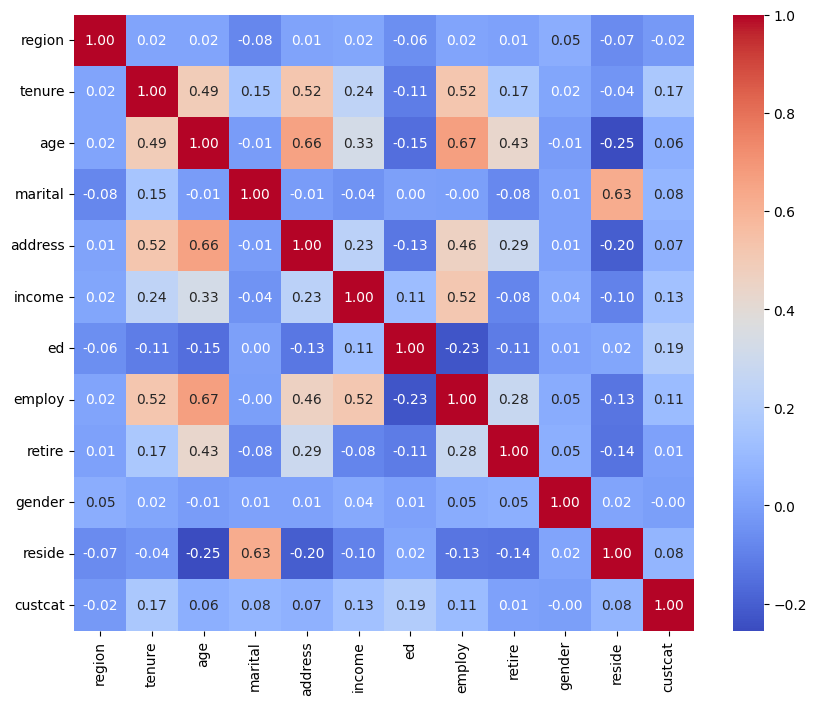

In [8]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [9]:
target_corr = corr['custcat'].sort_values(ascending=False)
target_corr

,custcat
custcat,1.000000
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
retire,0.008908


In [10]:
important_features = target_corr[0:6]

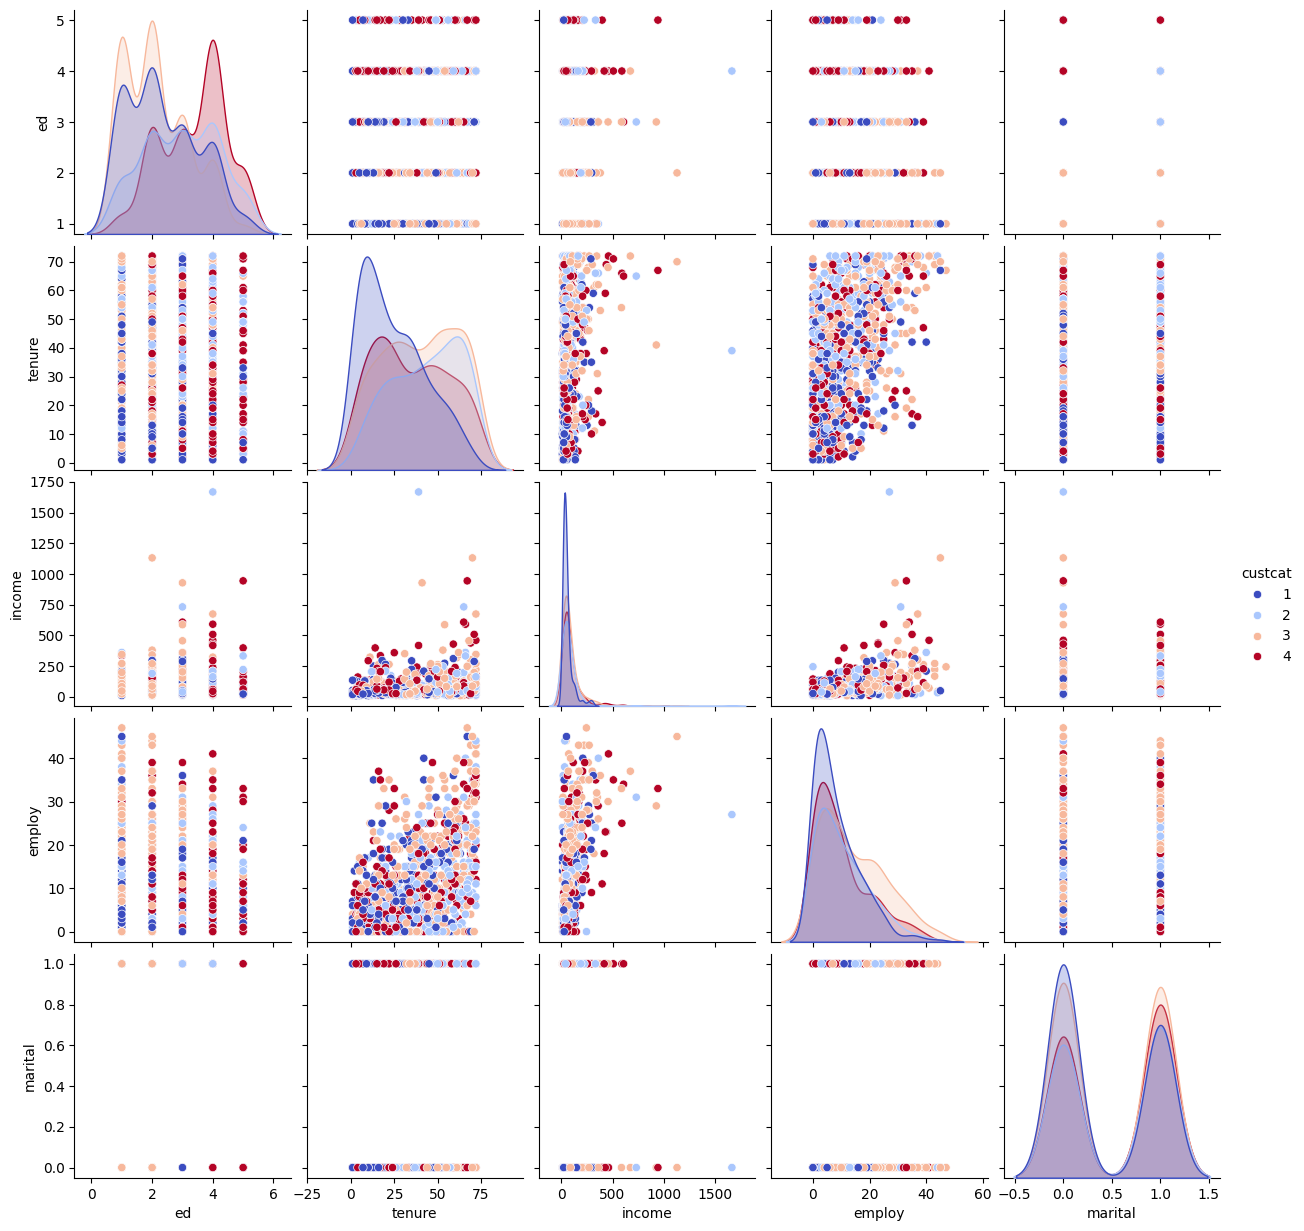

In [11]:
sns.pairplot(data[important_features.index], hue='custcat', diag_kind='kde', palette='coolwarm')
plt.show()

/tmp/ipython-input-3757236993.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=col, y='custcat', palette='coolwarm')


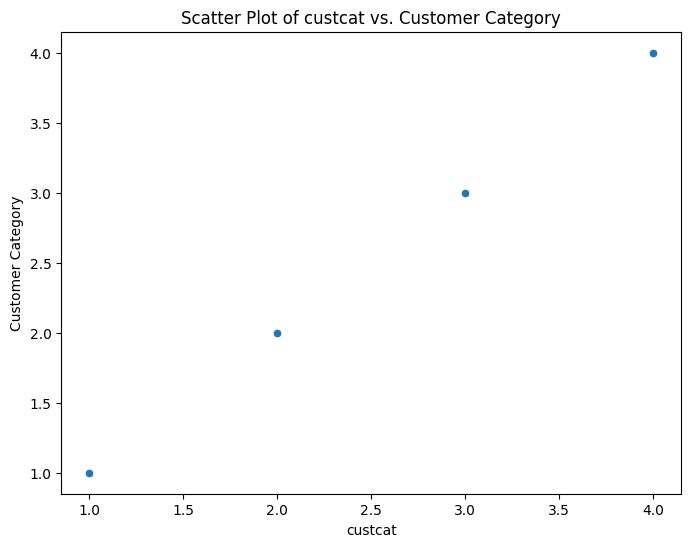

/tmp/ipython-input-3757236993.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=col, y='custcat', palette='coolwarm')


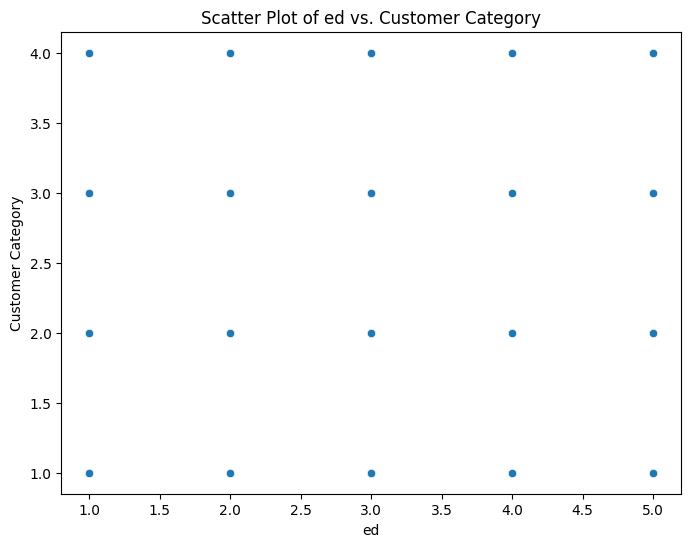

/tmp/ipython-input-3757236993.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=col, y='custcat', palette='coolwarm')


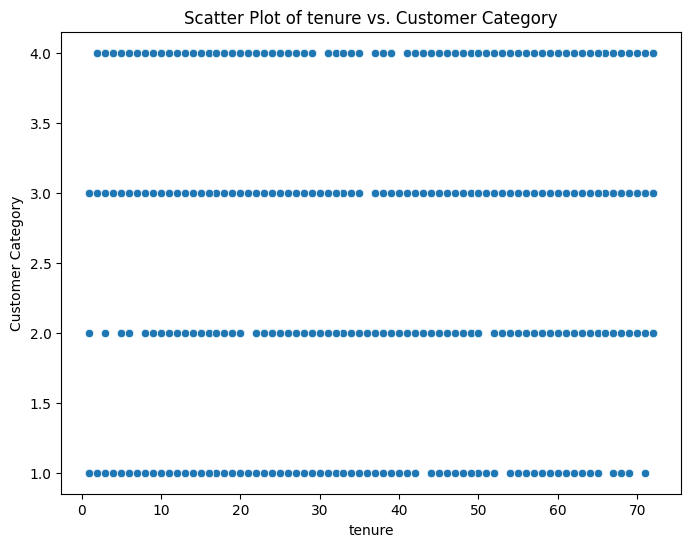

/tmp/ipython-input-3757236993.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=col, y='custcat', palette='coolwarm')


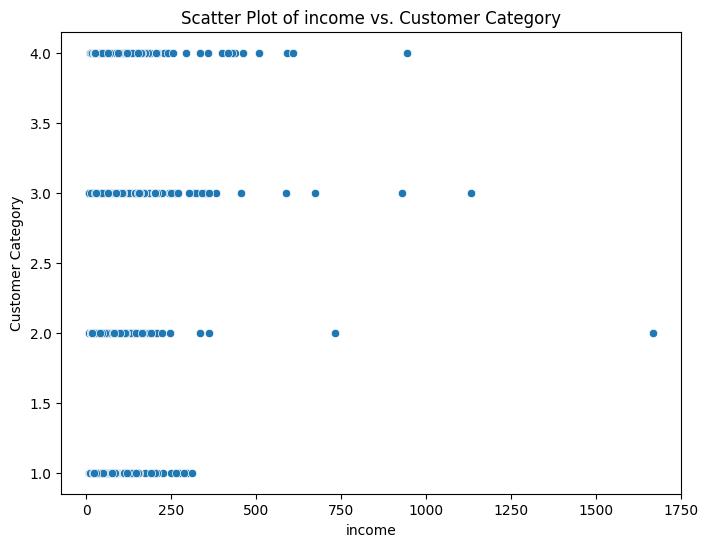

/tmp/ipython-input-3757236993.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=col, y='custcat', palette='coolwarm')


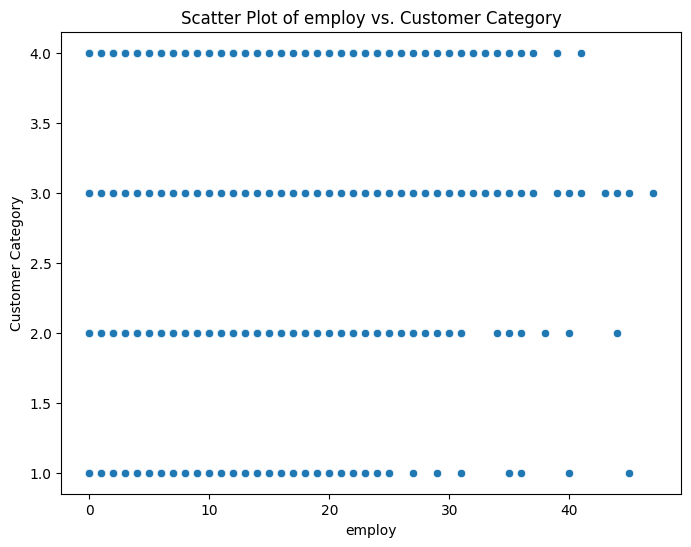

/tmp/ipython-input-3757236993.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x=col, y='custcat', palette='coolwarm')


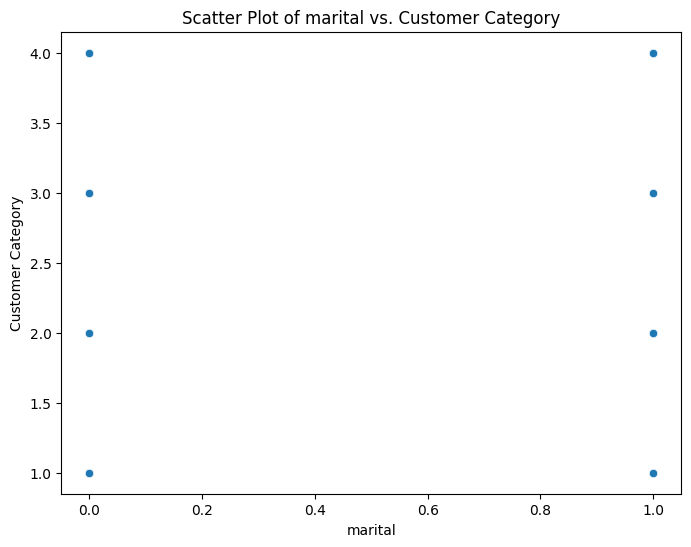

In [12]:
features = important_features.index.tolist()
for col in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=col, y='custcat', palette='coolwarm')
    plt.title(f'Scatter Plot of {col} vs. Customer Category')
    plt.xlabel(col)
    plt.ylabel('Customer Category')
    plt.show()


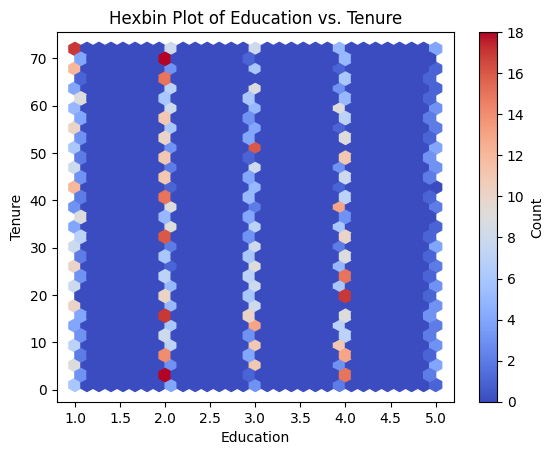

In [13]:
plt.hexbin(data['ed'], data['tenure'], gridsize=30, cmap='coolwarm')
plt.title('Hexbin Plot of Education vs. Tenure')
plt.colorbar(label='Count')
plt.xlabel('Education')
plt.ylabel('Tenure')
plt.show()

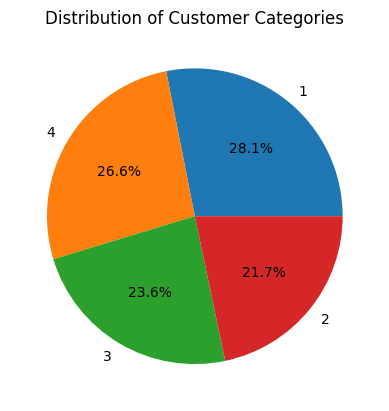

In [14]:
plt.pie(data['custcat'].value_counts(), labels=data['custcat'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Customer Categories')
plt.show()

/tmp/ipython-input-2393794214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='custcat', palette='coolwarm')


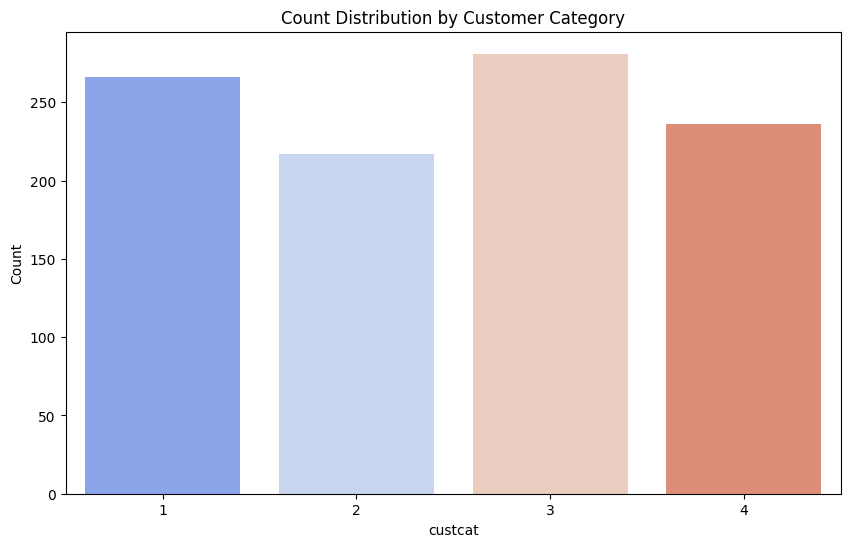

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='custcat', palette='coolwarm')
plt.title('Count Distribution by Customer Category')
plt.xlabel('custcat')
plt.ylabel('Count')
plt.show()

# Preprocessing

## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
data[['tenure','address', 'income', 'employ']] = scaler.fit_transform(data[['tenure'
,'address', 'income', 'employ']])



## Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
minmaxscaler = MinMaxScaler()
data[['age']] = minmaxscaler.fit_transform(data[['age']])

In [20]:
data_final = data.drop(columns=['retire', 'gender', 'region'])

# Feature selection and classical modeling

## Lasso

In [21]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [22]:
X = data_final.drop(columns=['custcat'])
y = data_final['custcat']

In [23]:

lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1)
lasso.fit(X, y)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [24]:

selector = SelectFromModel(lasso, prefit=True)
X_selected = selector.transform(X)

selected_features = X.columns[selector.get_support()]
print("ویژگی‌های انتخاب‌شده:")
print(selected_features)

ویژگی‌های انتخاب‌شده:
Index(['tenure', 'age', 'marital', 'income', 'ed', 'employ', 'reside'], dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_lasso = data_final[selected_features]
y_lasso = data_final['custcat']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=33)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model_1 = LogisticRegression(multi_class='ovr', max_iter=1000)
model_1.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [30]:
y_pred_test = model_1.predict(X_test)
y_pred_train = model_1.predict(X_train)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'accuracy_test: {accuracy_test}')
print(f'accuracy_train: {accuracy_train}')

accuracy_test: 0.33
accuracy_train: 0.4425


In [33]:
from sklearn.metrics import confusion_matrix

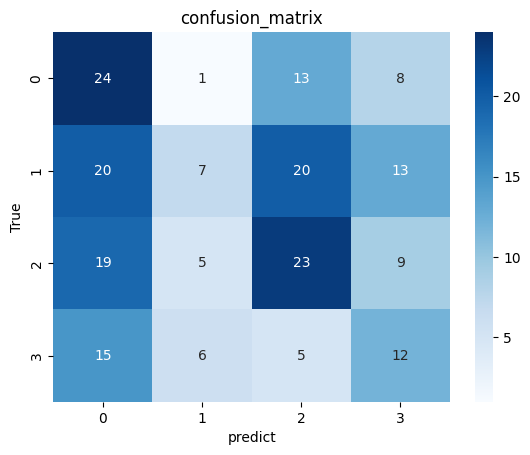

In [34]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predict')
plt.ylabel('True')
plt.title('confusion_matrix')
plt.show()

In [35]:
y_score_lasso = model_1.predict_proba(X_test)

In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

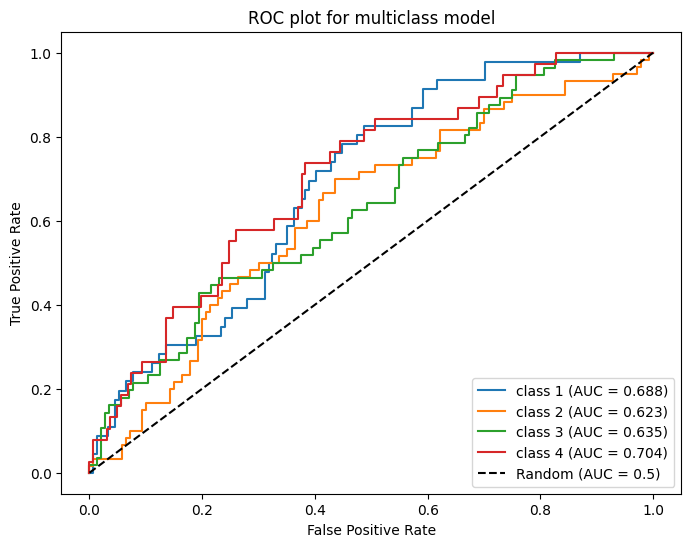

In [37]:
classes = np.unique(y_test)

y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lasso[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'class {c} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for multiclass model')
plt.legend(loc='lower right')
plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# مفروضات:
# model -> LogisticRegression آموزش‌دیده
# feature_names -> لیست اسم ستون‌های X به همان ترتیب که به مدل داده شد (مثلاً X.columns.tolist())

# اگر مدل چندکلاسه باشد، shape = (n_classes, n_features)
coefs = model_1.coef_        # numpy array
classes = model_1.classes_   # کلاس‌ها (مثلاً [0,1] یا [0,1,2,3])
feature_names = X_lasso.columns.tolist() # Define feature_names using the columns from X_lasso

# DataFrame ضرایب (هر سطر یک کلاس)
df_coefs = pd.DataFrame(coefs, columns=feature_names, index=[f'class_{c}' for c in classes])
display(df_coefs)

,tenure,age,marital,income,ed,employ,reside
class_1,-0.842240,0.229845,0.054051,-0.359990,-0.381181,-0.034790,-0.091225
class_2,0.852736,-0.673482,-0.219197,-0.064255,0.365293,-0.191973,0.035990
class_3,0.095419,0.125872,0.087603,0.069316,-0.548085,0.170798,-0.084588
class_4,0.028733,0.165116,-0.003303,0.052773,0.668928,0.094558,0.180083


In [39]:
importance = df_coefs.abs().mean(axis=0).sort_values(ascending=False)
importance_df = importance.reset_index()
importance_df.columns = ['feature', 'mean_abs_coef']
print(importance_df.head(10))


   feature  mean_abs_coef
0       ed       0.490872
1   tenure       0.454782
2      age       0.298579
3   income       0.136583
4   employ       0.123030
5   reside       0.097972
6  marital       0.091039


## RFE

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [41]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [42]:
selected_features_rfe = X.columns[rfe.support_]
selected_features_rfe

Index(['tenure', 'age', 'income', 'ed', 'employ'], dtype='object')

In [43]:
X_rfe = data_final[selected_features_rfe]
y_rfe = data_final['custcat']

In [44]:
# X[['ed', 'reside']] = scaler.fit_transform(X[['ed', 'reside']])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_rfe, test_size=0.2, random_state=33)

In [46]:
model_2 = LogisticRegression(multi_class='multinomial', max_iter=1000)
model_2.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [47]:
y_pred_test = model_2.predict(X_test)
y_pred_train = model_2.predict(X_train)

In [48]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'accuracy_test: {accuracy_test}')
print(f'accuracy_train: {accuracy_train}')


accuracy_test: 0.325
accuracy_train: 0.44875


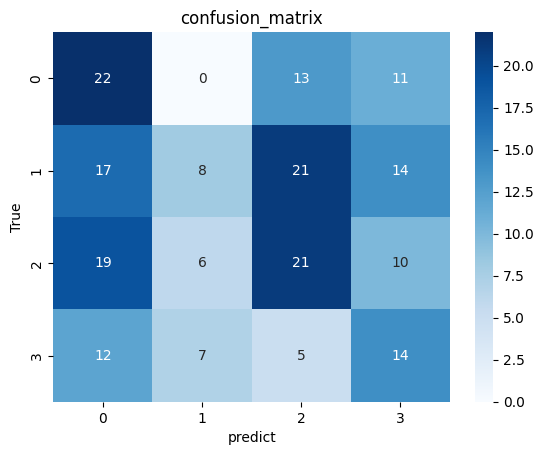

In [49]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predict')
plt.ylabel('True')
plt.title('confusion_matrix')
plt.show()

In [50]:
y_score_rfe = model_2.predict_proba(X_test)

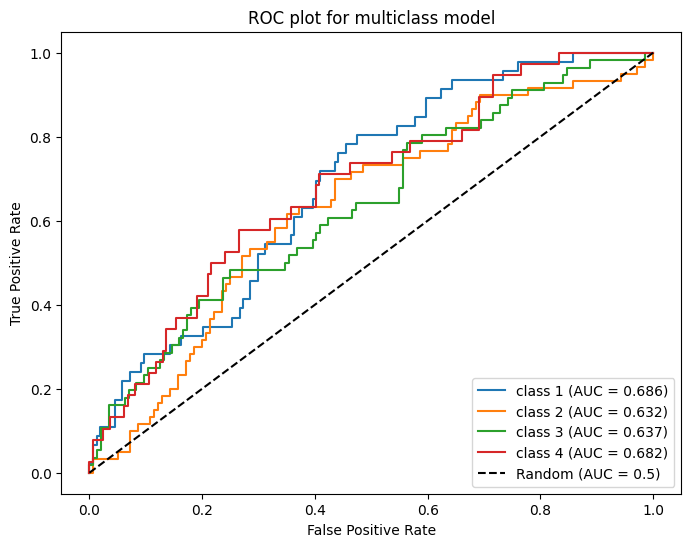

In [51]:
classes = np.unique(y_test)

y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rfe[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'class {c} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for multiclass model')
plt.legend(loc='lower right')
plt.show()

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# مفروضات:
# model -> LogisticRegression آموزش‌دیده
# feature_names -> لیست اسم ستون‌های X به همان ترتیب که به مدل داده شد (مثلاً X.columns.tolist())

# اگر مدل چندکلاسه باشد، shape = (n_classes, n_features)
coefs = model_2.coef_        # numpy array
classes = model_2.classes_   # کلاس‌ها (مثلاً [0,1] یا [0,1,2,3])
feature_names = X_rfe.columns.tolist() # Define feature_names using the columns from X_lasso

# DataFrame ضرایب (هر سطر یک کلاس)
df_coefs = pd.DataFrame(coefs, columns=feature_names, index=[f'class_{c}' for c in classes])
display(df_coefs)

,tenure,age,income,ed,employ
class_1,-0.697731,0.422522,-0.258775,-0.333571,-0.010438
class_2,0.661679,-0.553277,0.024675,0.302890,-0.139361
class_3,-0.022030,0.290421,0.135793,-0.460546,0.084701
class_4,0.058081,-0.159666,0.098308,0.491227,0.065097


In [53]:
importance = df_coefs.abs().mean(axis=0).sort_values(ascending=False)
importance_df = importance.reset_index()
importance_df.columns = ['feature', 'mean_abs_coef']
print(importance_df.head(10))


  feature  mean_abs_coef
0      ed       0.397059
1  tenure       0.359880
2     age       0.356472
3  income       0.129388
4  employ       0.074899


# PCA

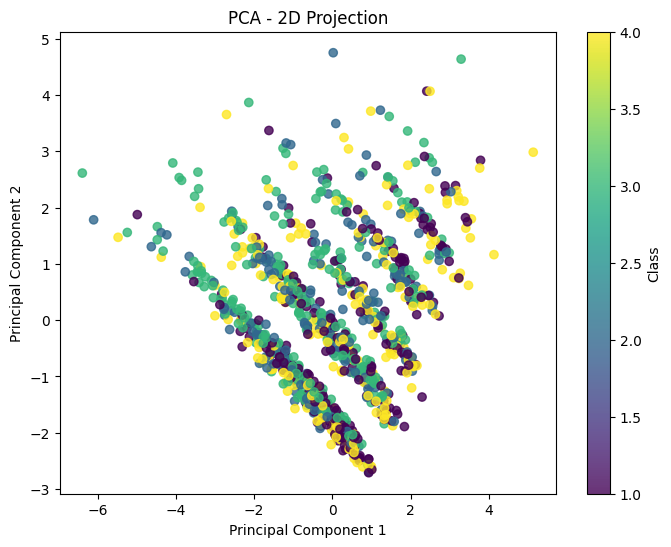

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.8)
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=33)

In [56]:
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [57]:
y_pred = model.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.28

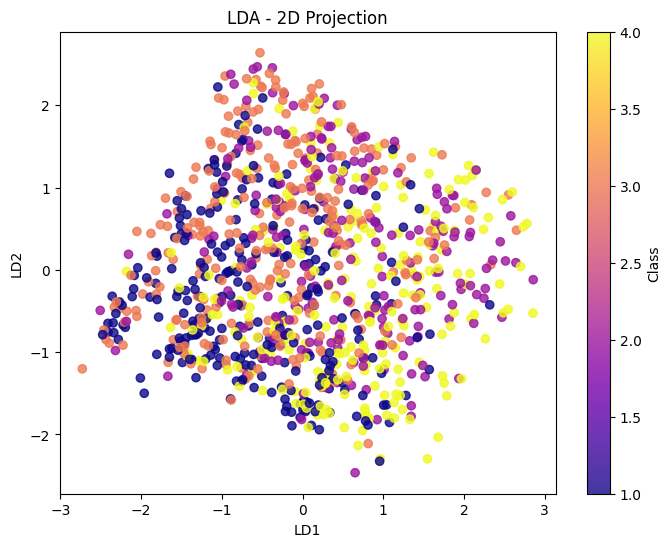

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='plasma', alpha=0.8)
plt.title('LDA - 2D Projection')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.colorbar(label='Class')
plt.show()


# MLP

In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

In [61]:
X = data_final.drop(columns=['custcat'])
y = data_final['custcat']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [63]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(50, activation='relu')(inputs)
x = Dense(25, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(5, activation='relu')(x)
x = Dense(2, activation='relu', name='feature_layer')(x)
outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [64]:
y_train_cat = to_categorical(y_train - 1, num_classes=4)
y_test_cat = to_categorical(y_test - 1, num_classes=4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=50, batch_size=16, verbose=1)

loss, acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {acc:.3f}")

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2708 - loss: 1.3892 - val_accuracy: 0.2800 - val_loss: 1.3879
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2851 - loss: 1.3842 - val_accuracy: 0.2800 - val_loss: 1.3889
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2604 - loss: 1.3819 - val_accuracy: 0.2800 - val_loss: 1.3901
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2942 - loss: 1.3813 - val_accuracy: 0.2800 - val_loss: 1.3912
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2759 - loss: 1.3808 - val_accuracy: 0.2800 - val_loss: 1.3925
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2667 - loss: 1.3831 - val_accuracy: 0.2800 - val_loss: 1.3932
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2637 - loss: 1.3812 - val_accuracy: 0.2800 - val_loss: 1.3946
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3202 - loss: 1.3782 - val_accuracy: 0.2800 - va

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


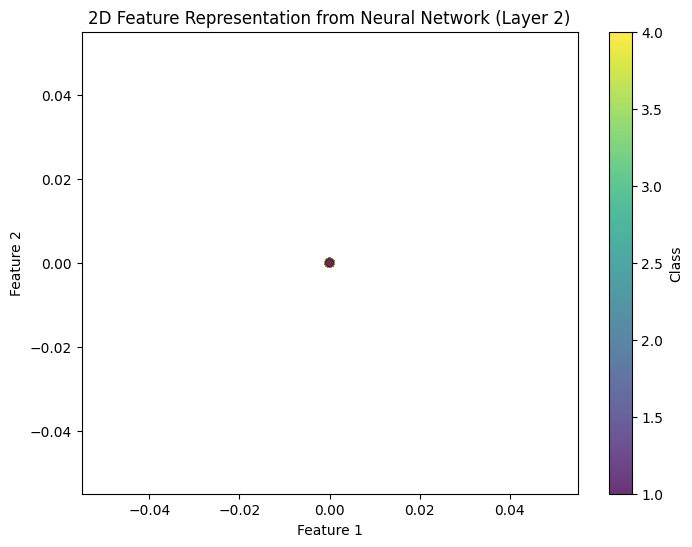

In [65]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('feature_layer').output)

X_features = feature_extractor.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_features[:,0], X_features[:,1], c=y_test, cmap='viridis', alpha=0.8)
plt.title('2D Feature Representation from Neural Network (Layer 2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()
